In [1]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# accessing the file from google drive and using head() to see first five complete rows just to understant the dataset
path='/content/drive/MyDrive/Dataset/aerofit_treadmill.csv'
df=pd.read_csv(path)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
# lets see which type of data each column holds
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
# lets check for any null values
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


## Observation:
Looks like there are no null values in the dataset.

In [6]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


## Observations:


*   There is no null value in the dataset.
*   There are 3 unique products with 'KP281' as most frequent.
*   Average age is 28.78 and age range is 18-50 years.
*   Out of 180 people, 107 are male and rest female.
*   Average education in years is 15.57 yrs with 75% of members have 16 or less
    years of education.
*   Out of 180 people, 107 are married.
*   Only 25% of 180 people have usage more than 4days in a week.
*   In income and miles, there might be outliers as the the maximum value is greater than 1.5 times of Q3.







In [7]:
# shape of data shape
df.shape

(180, 9)

- So the table has 180 rows and 9 columns

In [8]:
# Total number of people using different type of treadmill
df.groupby('Product')['Age'].count()

,Age
Product,
KP281,80
KP481,60
KP781,40


## lets see if there are any outliers for all the numerical variables:
*   Age
*   Education
*   Usage
*   Fitness
*   Income
*   Miles

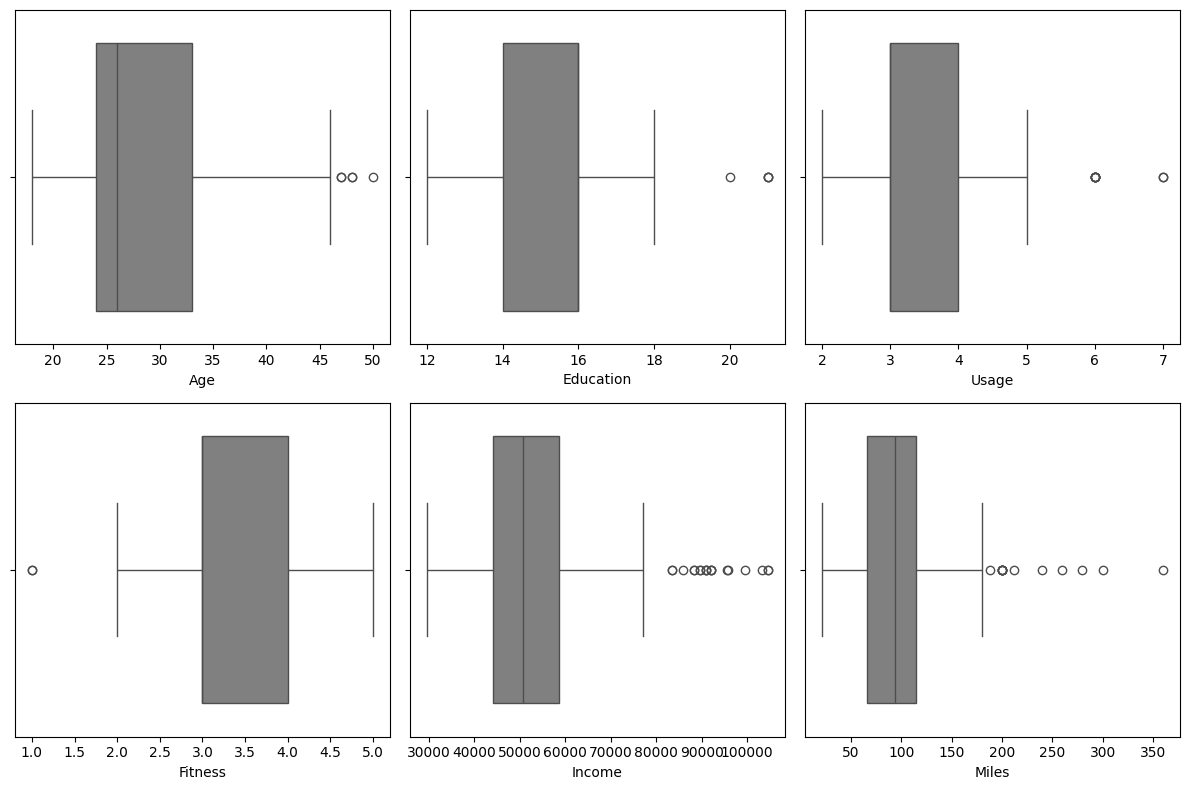

In [9]:
fig, ax= plt.subplots(nrows=2, ncols=3, figsize=(12,8))
col=['Age','Education','Usage','Fitness','Income','Miles']
c=0
for i in range (2):
  for j in range (3):
    sns.boxplot(df,x=df[col[c]],ax=ax[i][j],color='grey')
    c=c+1
plt.tight_layout()

## Observation:
*   There are very few outliers in Age, Education, Usage and Fitness.
*   It is quite evident that there are many outliers in Income and Miles.

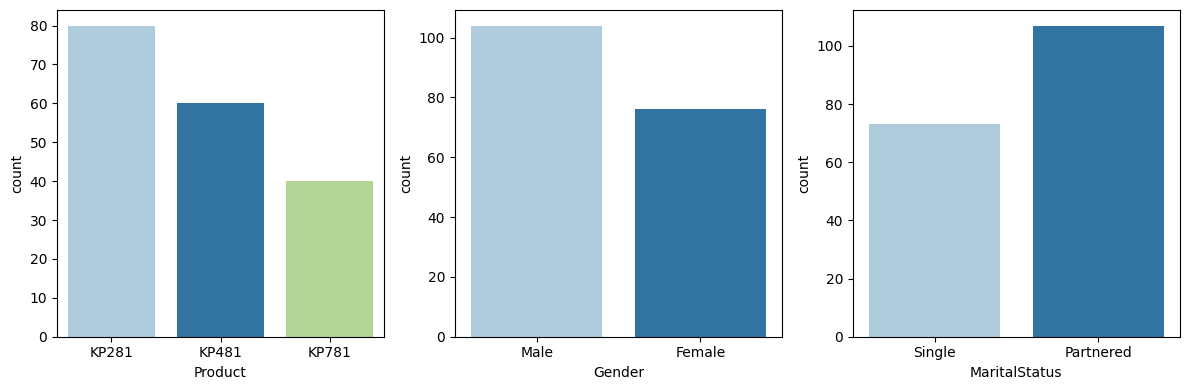

In [10]:
# Understanding the distribution of the data in the categorical variables.

fig, ax= plt.subplots(nrows=1,ncols=3,figsize=(12,4))
col=['Product','Gender','MaritalStatus']
c=0
for i in range (1):
  for j in range (3):
    sns.countplot(df,x=df[col[c]],ax=ax[j],palette='Paired',hue=col[c])
    c=c+1
plt.tight_layout()
plt.show()

## Observations:
*  Most selled product is KP281.
*  There are more Males in the dataset.
*  There are more Partnered person.

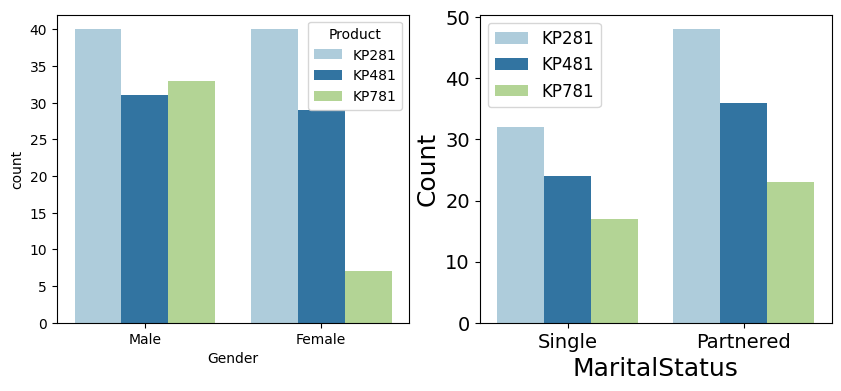

In [11]:
#  Check if features like MaritalStatus and Gender, have any effect on the product purchased

fig, ax= plt.subplots(nrows=1,ncols=2,figsize=(10,4))
col=['Gender','MaritalStatus']
c=0
for i in range (1):
  for j in range (2):
    sns.countplot(df,x=df[col[c]],hue='Product',palette='Paired',ax=ax[j])
    plt.legend(prop={'size': 12})
    # Set the font size for the axis labels
    plt.xlabel(col[c], fontsize=18)
    plt.ylabel('Count', fontsize=18)

    # Set the font size for the tick labels
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    c=c+1
plt.show()

## Observations:
*  Product KP281 and KP481 has almost same number of male and female purchaser.
*  Product KP781 has significantly more number of male purchaser.
*  As compared to single customer, Partnered customer are more likely to purchase the product.


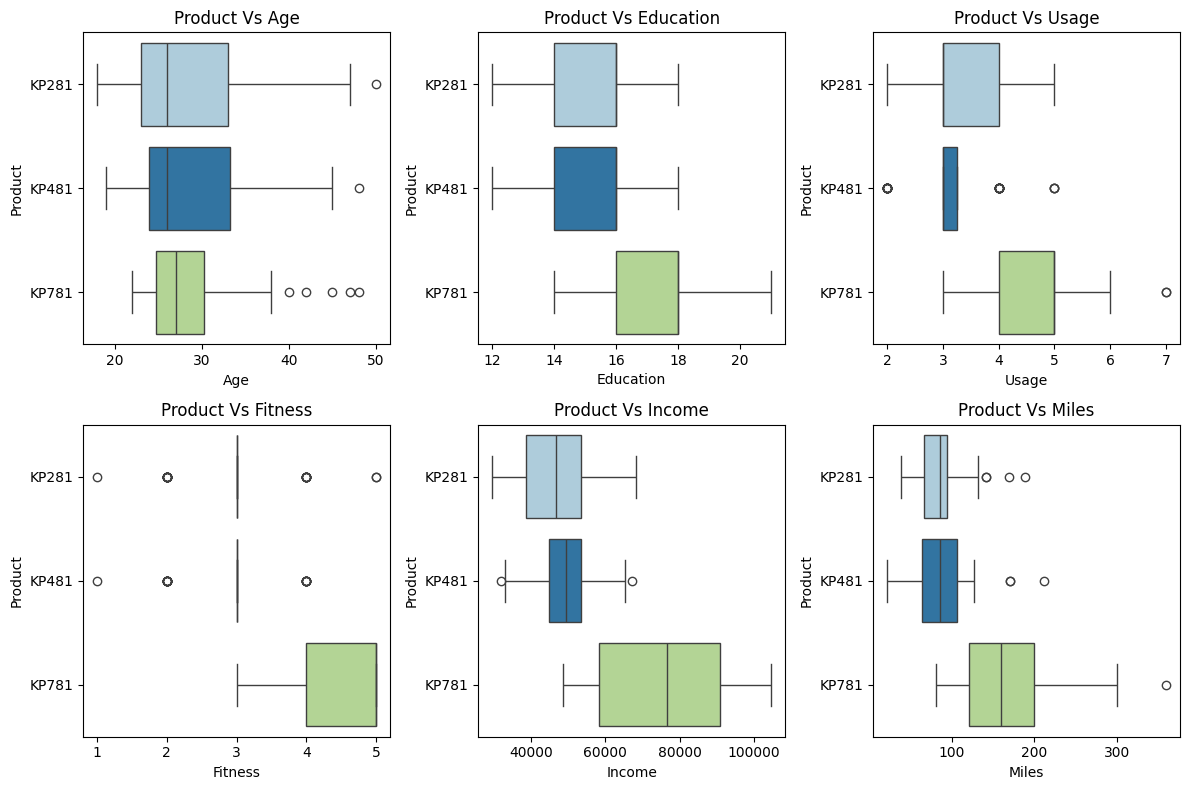

In [12]:
# Let see if numerical variables has any effect on purchase using box plot
fig, ax=plt.subplots(nrows=2,ncols=3,figsize=(12,8))
col=['Age','Education','Usage','Fitness','Income','Miles']
c=0
for i in range (2):
  for j in range (3):
    sns.boxplot(df,x=df[col[c]],y=df['Product'],ax=ax[i][j],hue='Product',palette='Paired')
    ax[i][j].set_title(f'Product Vs {col[c]}')
    c=c+1
plt.tight_layout()

## Observations:
*  For Product Vs Age
    1. The median age of both the Product KP281 and KP481 are same.
    2. There are not much outliers for both the product KP281 and KP481 unlike KP781.
    3. People in the age group 25-30 are majority purchaser of product KP781.

*  For Product Vs Education
    1. Chances of people purchasing the product KP281 and KP481 is equal if they have education below 16 yrs.
    2. People with education above 16 yrs are more likely to purchase the product KP781.

*  For Product Vs Usage
    1. Customer who plan to use the treadmill less than 4 times a week, are more likely to purchase KP281 or KP481.
    2. Customer who plan to use the treadmill more than 4 times a week, are more likely to purchase KP781.

*  For Product Vs Fitness
    1. Customers who rates themselves above 4 have higher chances of purchasing KP781.

*  For Product Vs Income
    1. Higher the income (>=60000), more likely the customer will purchase KP781.

*  For Product Vs Miles
    1. Customer who intends to walk/run more than 120 miles, are more likely to purchase KP781.




<function matplotlib.pyplot.show(close=None, block=None)>

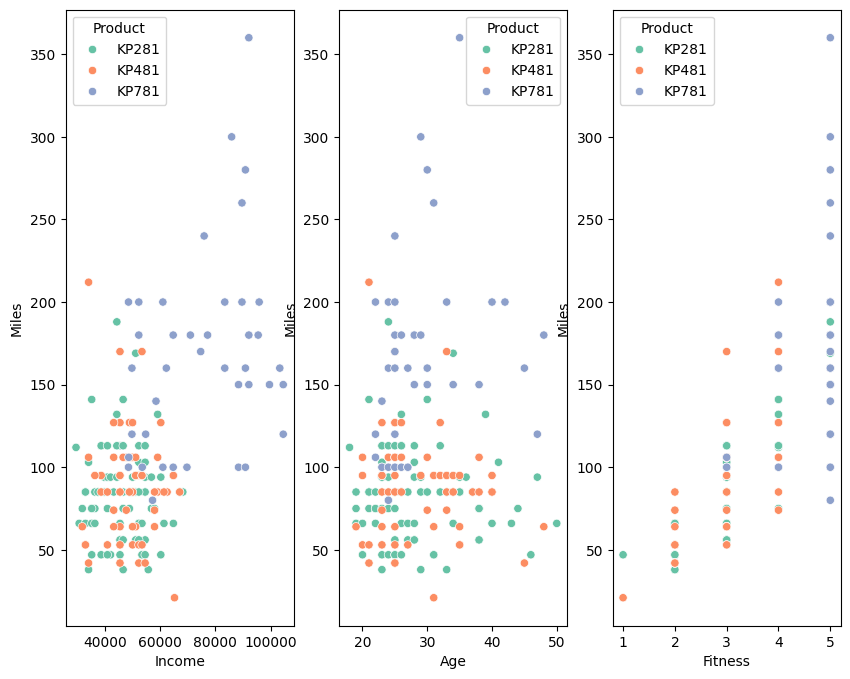

In [13]:
# Lets see if there is any relation between 2 numerical variables
fig, ax=plt.subplots(nrows=1,ncols=3,figsize=(10,8))
sns.scatterplot(df,x=df['Income'],y=df['Miles'],hue='Product',palette='Set2',ax=ax[0])
sns.scatterplot(df,x=df['Age'],y=df['Miles'],hue='Product',palette='Set2',ax=ax[1])
sns.scatterplot(df,x=df['Fitness'],y=df['Miles'],hue='Product',palette='Set2',ax=ax[2])
plt.show

## Observations:
*  With increase in income and miles, likelyhood of a customer purchasing KP781 is high.
*  With high rating use of advance product increases.

In [14]:
# Finding the marginal probality (what percent of customers have purchased KP281, KP481, or KP781)
mp=pd.crosstab(index=df['Product'],columns='count',normalize=True)
round(mp*100,2)

col_0,count
Product,
KP281,44.44
KP481,33.33
KP781,22.22


## Observation:
*  44.44% of customer have product KP281.
*  33.33% of customer have product KP481.
*  22.22% of customer have product KP781.

In [15]:
df1=df[['Product', 'Gender', 'MaritalStatus']].melt()
valuewise_total=round(df1.groupby(['variable','value'])['value'].count(),2)
valuewise_total

variable       value    
Gender         Female        76
               Male         104
MaritalStatus  Partnered    107
               Single        73
Product        KP281         80
               KP481         60
               KP781         40
Name: value, dtype: int64

In [16]:
# Marginal Probability
df1=df[['Product', 'Gender', 'MaritalStatus']].melt()
valuewise_prob=round(df1.groupby(['variable','value'])['value'].count()/len(df),2)
valuewise_prob

variable       value    
Gender         Female       0.42
               Male         0.58
MaritalStatus  Partnered    0.59
               Single       0.41
Product        KP281        0.44
               KP481        0.33
               KP781        0.22
Name: value, dtype: float64

In [17]:
crosstab_maritalstatus=pd.crosstab(columns=df['MaritalStatus'],index=df['Product'],margins=True)
crosstab_maritalstatus

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [18]:
# Conditional Probablility
# probability of customer buying a product given that customer is Partnered/single
crosstab_nomargin=crosstab_maritalstatus.iloc[:-1,:-1]
crosstab_nomargin.div(crosstab_nomargin.sum(axis=0), axis=1)

MaritalStatus,Partnered,Single
Product,,
KP281,0.448598,0.438356
KP481,0.336449,0.328767
KP781,0.214953,0.232877


## Observation:
* There is 44.86% chance of customer purchasing KP281 given that customer is partnered and 43.83% chance of customer purchasing KP281 given that customer is single.
* There is 33.64% chance of customer purchasing KP481 given that customer is partnered and 32.87% chance of customer purchasing KP481 given that customer is single.
* There is 21.49% chance of customer purchasing KP781 given that customer is partnered and 23.28% chance of customer purchasing KP781 given that customer is single.

In [19]:
crosstab_gender=pd.crosstab(columns=df['Gender'],index=df['Product'],margins=True)
crosstab_gender

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [20]:
# Conditional Probablility
# probability of customer buying a product given that customer is male/female
crosstab_nomargin=crosstab_gender.iloc[:-1,:-1]
crosstab_nomargin.div(crosstab_nomargin.sum(axis=0), axis=1)

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


## Observation:
* There is 52.63% chance of customer purchasing KP281 given that customer is female and 38.46% chance of customer purchasing KP281 given that customer is male.
* There is 38.15% chance of customer purchasing KP481 given that customer is female and 29.80% chance of customer purchasing KP481 given that customer is male.
* There is 9.21% chance of customer purchasing KP781 given that customer is female and 31.7% chance of customer purchasing KP781 given that customer is male.

In [21]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check the correlation among different factors
corr=numeric_df.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


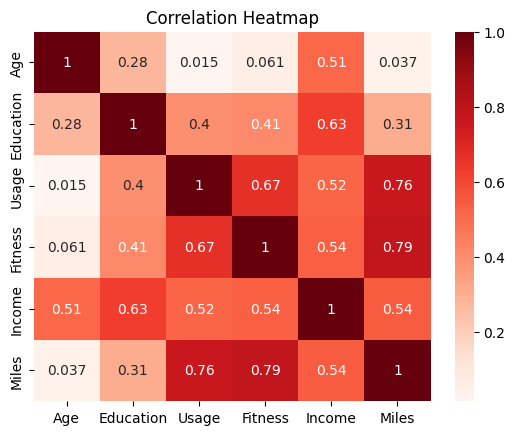

In [22]:
# Create heatmap
sns.heatmap(corr, annot=True, cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()